In [4]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import open3d as o3d

In [2]:
import test2
importlib.reload(test2)


<module 'test2' from '/home/s5614279/MasterClass/Depth2Mesh/test2.py'>

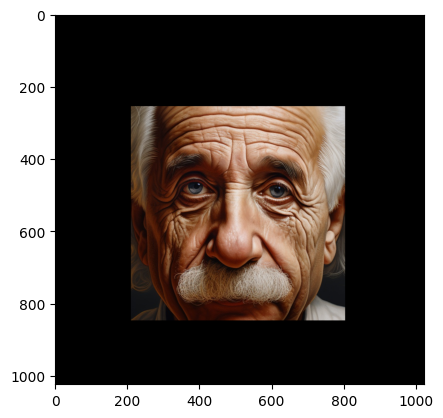

In [5]:
depth_img = cv2.imread('/home/s5614279/MasterClass/Depth2Mesh/dpeth_output/einstein_depth_colored.png', cv2.IMREAD_UNCHANGED)
color_img = cv2.imread('/home/s5614279/MasterClass/Depth2Mesh/input/einstein.jpg')
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

depth_seg_img, color_seg_img = test2.face_segmentation(depth_img, color_img)
depth_seg_img = np.array(depth_seg_img)
color_seg_img = np.array(color_seg_img)

plt.imshow(color_seg_img)


In [6]:
pointcloud_color_2 = test2.depth_to_pointcloud_colour(depth_img, color_img, depth_scale=0.5, depth_trunc=1, fx=700, fy=700, cx=None, cy=None)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pointcloud_color_2[:, :3])
pcd.colors = o3d.utility.Vector3dVector(pointcloud_color_2[:, 3:] / 255.0)
o3d.visualization.draw_geometries([pcd])